In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import io
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from wordcloud import WordCloud

In [11]:
#Loading datafile
df = pd.read_csv('pre_clean_text_680.csv', encoding = 'latin-1')

In [12]:
import TEXT #Eginuity's function

In [13]:
def cleantext(text):
    text = TEXT.extract_text(text)
    text = re.sub(r'http\S+', r'', text)
    text = re.sub(r'[\w.-]+@[\w.-]+', r'', text)
    text = re.sub(r'\b\d{6,}', r'', text)
    return text

In [14]:
df["clean1"]= df["clean1"].astype(str)
df['clean2']= df['clean1'].apply(cleantext)

In [15]:
df["clean2"] = df["clean1"].map(lambda x: re.sub('[,\.!?]', '', x))
df["clean2"] = df["clean2"].map(lambda x: x.lower())

### WordCloud

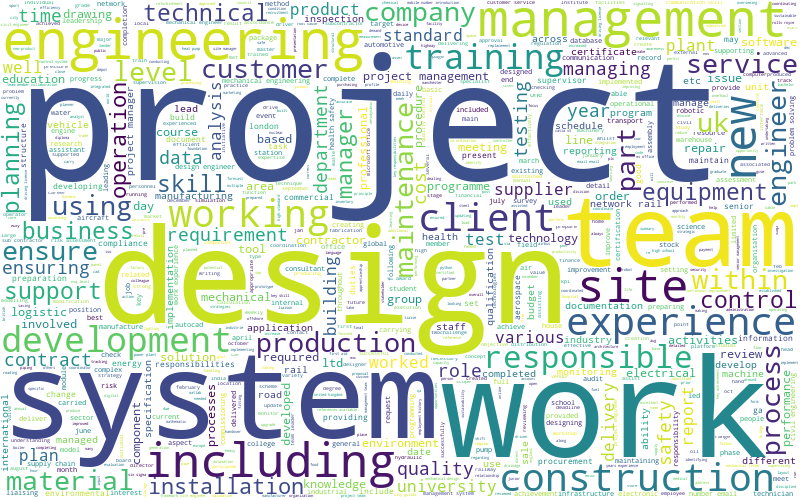

In [148]:
#Join the different processed titles together.
plong_string = ','.join(list(df['clean2'].values))

#Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=10000, contour_width=5, contour_color='steelblue', width = 800, height = 500)

#Generate a word cloud
wordcloud.generate(plong_string)

#Visualize the word cloud
wordcloud.to_image()

#### 3.1.3.6.2 Topic modeling

In [18]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lavin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
#define stemming lemmatization functions
def lemmatize_stemming(text):
    stemmer = SnowballStemmer("english")
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [20]:
dftest=df

In [21]:
#lemmatize and stem texts
dftest['processed']= dftest['clean2'].apply(preprocess)

In [25]:
#Create remove stop words
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = dftest.processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['educ', 'space', 'astronaut', 'engin', 'sapienza', 'univers', 'rome', 'itali', 'relev', 'coursework', 'compress', 'flow', 'experiment', 'aerodynam', 'spaceflight', 'mechan', 'space', 'mission', 'system', 'space', 'propuls', 'spacecraft', 'design', 'aerospac', 'structur', 'control', 'aerospac', 'materi', 'combust', 'experiment']


In [28]:
#create corpora
import gensim.corpora as corpora
id2word = corpora.Dictionary(data_words)
texts = data_words
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])

[(0, 1), (1, 2), (2, 1), (3, 3), (4, 3), (5, 4), (6, 1), (7, 8), (8, 2), (9, 1), (10, 2), (11, 2), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 3), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 2), (27, 2), (28, 1), (29, 1)]


In [29]:
from pprint import pprint

In [30]:
#define function
def make_topics(df, topic_number):

    data = df.values.tolist()
    data_words = list(sent_to_words(data))
    # remove stop words
    data_words = remove_stopwords(data_words)

    id2word = corpora.Dictionary(data_words)
    # Create Corpus
    texts = data_words
    # Term Document Frequency
    corpus = [id2word.doc2bow(text) for text in texts]

    num_topics = topic_number
    # Build LDA model
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics)
    # Print the Keyword in the 10 words
    pprint(lda_model.print_topics())
    doc_lda = lda_model[corpus]
    topics = pd.DataFrame(lda_model.print_topics())
    return topics

In [36]:
#try 15 topics for all data
topics_all_doc = make_topics(dftest.processed, 15)

[(0,
  '0.016*"manag" + 0.015*"work" + 0.014*"engin" + 0.010*"project" + '
  '0.008*"design" + 0.007*"skill" + 0.006*"team" + 0.006*"experi" + '
  '0.006*"develop" + 0.006*"train"'),
 (1,
  '0.017*"project" + 0.014*"design" + 0.013*"engin" + 0.009*"work" + '
  '0.008*"manag" + 0.008*"develop" + 0.006*"team" + 0.006*"process" + '
  '0.006*"plan" + 0.005*"product"'),
 (2,
  '0.019*"manag" + 0.016*"project" + 0.016*"engin" + 0.013*"work" + '
  '0.007*"design" + 0.007*"develop" + 0.007*"team" + 0.006*"site" + '
  '0.005*"experi" + 0.005*"includ"'),
 (3,
  '0.020*"engin" + 0.015*"work" + 0.015*"project" + 0.015*"manag" + '
  '0.010*"design" + 0.007*"includ" + 0.007*"product" + 0.007*"team" + '
  '0.006*"develop" + 0.006*"process"'),
 (4,
  '0.027*"manag" + 0.013*"project" + 0.010*"engin" + 0.009*"work" + '
  '0.008*"oper" + 0.007*"team" + 0.007*"site" + 0.007*"design" + '
  '0.007*"develop" + 0.006*"product"'),
 (5,
  '0.019*"work" + 0.018*"engin" + 0.013*"manag" + 0.013*"project" + '
  '0.

In [39]:
topics_all_doc.to_csv('topics_all_doc.csv')

In [40]:
#15 topics for all female CVs
topics_f_doc = make_topics(dftest[dftest['Gender']==1].processed, 15)

[(0,
  '0.015*"manag" + 0.015*"work" + 0.007*"test" + 0.007*"project" + '
  '0.007*"engin" + 0.007*"custom" + 0.006*"busi" + 0.006*"team" + '
  '0.005*"servic" + 0.005*"ensur"'),
 (1,
  '0.019*"manag" + 0.017*"project" + 0.013*"engin" + 0.012*"design" + '
  '0.009*"work" + 0.008*"product" + 0.007*"team" + 0.006*"skill" + '
  '0.006*"process" + 0.005*"develop"'),
 (2,
  '0.020*"project" + 0.018*"manag" + 0.014*"engin" + 0.009*"develop" + '
  '0.008*"design" + 0.008*"team" + 0.007*"work" + 0.005*"skill" + '
  '0.005*"custom" + 0.005*"data"'),
 (3,
  '0.017*"project" + 0.016*"manag" + 0.016*"engin" + 0.012*"work" + '
  '0.009*"design" + 0.008*"team" + 0.007*"skill" + 0.006*"train" + '
  '0.006*"product" + 0.005*"test"'),
 (4,
  '0.017*"work" + 0.012*"project" + 0.011*"manag" + 0.011*"design" + '
  '0.010*"engin" + 0.008*"test" + 0.007*"team" + 0.006*"develop" + '
  '0.005*"report" + 0.005*"includ"'),
 (5,
  '0.018*"manag" + 0.012*"engin" + 0.011*"project" + 0.011*"work" + '
  '0.009*"deve

In [41]:
topics_f_doc.to_csv('topics_f_doc.csv')

In [42]:
#15 topics for all male CVs
topics_m_doc = make_topics(dftest[dftest['Gender']==0].processed, 15)
topics_m_doc.to_csv('topics_m_doc.csv')

[(0,
  '0.017*"work" + 0.015*"manag" + 0.015*"design" + 0.013*"project" + '
  '0.011*"engin" + 0.008*"site" + 0.007*"team" + 0.006*"process" + '
  '0.006*"develop" + 0.006*"includ"'),
 (1,
  '0.014*"work" + 0.014*"manag" + 0.013*"project" + 0.012*"engin" + '
  '0.008*"develop" + 0.008*"construct" + 0.007*"design" + 0.006*"site" + '
  '0.006*"build" + 0.006*"includ"'),
 (2,
  '0.024*"engin" + 0.024*"manag" + 0.019*"project" + 0.016*"work" + '
  '0.013*"design" + 0.008*"develop" + 0.007*"includ" + 0.007*"team" + '
  '0.006*"experi" + 0.005*"mechan"'),
 (3,
  '0.017*"work" + 0.016*"engin" + 0.010*"design" + 0.010*"project" + '
  '0.008*"mechan" + 0.007*"manag" + 0.006*"team" + 0.006*"experi" + '
  '0.005*"develop" + 0.005*"site"'),
 (4,
  '0.024*"work" + 0.014*"project" + 0.013*"engin" + 0.012*"manag" + '
  '0.008*"construct" + 0.008*"rail" + 0.007*"design" + 0.006*"team" + '
  '0.006*"site" + 0.006*"experi"'),
 (5,
  '0.019*"project" + 0.016*"work" + 0.015*"engin" + 0.012*"manag" + '
  '

In [43]:
#contstruct topic models for all search terms individually (not included in text)
term_topic_doc = pd.DataFrame()
for i in dftest['Search term'].unique():
    df_temp = make_topics(dftest[dftest['Search term']==i]['processed'], 5)
    df_temp['term'] = i
    term_topic_doc = pd.concat([term_topic_doc,df_temp])
term_topic_doc.to_csv('term_topic_doc.csv')

[(0,
  '0.016*"engin" + 0.015*"manag" + 0.012*"work" + 0.010*"design" + '
  '0.010*"product" + 0.009*"project" + 0.009*"aerospac" + 0.009*"custom" + '
  '0.008*"team" + 0.008*"manufactur"'),
 (1,
  '0.013*"engin" + 0.012*"manag" + 0.010*"work" + 0.010*"design" + '
  '0.009*"aerospac" + 0.008*"team" + 0.008*"product" + 0.008*"project" + '
  '0.007*"process" + 0.006*"manufactur"'),
 (2,
  '0.016*"engin" + 0.012*"product" + 0.012*"qualiti" + 0.012*"manag" + '
  '0.010*"team" + 0.010*"project" + 0.009*"work" + 0.009*"aerospac" + '
  '0.009*"manufactur" + 0.008*"custom"'),
 (3,
  '0.019*"engin" + 0.019*"manag" + 0.015*"project" + 0.015*"design" + '
  '0.010*"team" + 0.009*"aerospac" + 0.009*"work" + 0.007*"develop" + '
  '0.007*"product" + 0.006*"skill"'),
 (4,
  '0.016*"manag" + 0.014*"engin" + 0.012*"design" + 0.012*"project" + '
  '0.012*"aerospac" + 0.009*"work" + 0.009*"team" + 0.008*"product" + '
  '0.007*"develop" + 0.006*"skill"')]
[(0,
  '0.022*"work" + 0.021*"mechan" + 0.020*"engi

[(0,
  '0.020*"engin" + 0.015*"project" + 0.012*"manag" + 0.012*"design" + '
  '0.010*"energi" + 0.008*"work" + 0.007*"develop" + 0.006*"build" + '
  '0.006*"experi" + 0.006*"product"'),
 (1,
  '0.015*"project" + 0.015*"manag" + 0.012*"engin" + 0.010*"work" + '
  '0.010*"energi" + 0.009*"design" + 0.007*"sustain" + 0.007*"develop" + '
  '0.006*"build" + 0.006*"team"'),
 (2,
  '0.016*"manag" + 0.014*"energi" + 0.014*"engin" + 0.013*"project" + '
  '0.011*"design" + 0.011*"work" + 0.009*"build" + 0.006*"mechan" + '
  '0.005*"develop" + 0.005*"product"'),
 (3,
  '0.021*"engin" + 0.018*"energi" + 0.013*"project" + 0.011*"manag" + '
  '0.009*"design" + 0.008*"product" + 0.008*"work" + 0.006*"process" + '
  '0.006*"develop" + 0.005*"build"'),
 (4,
  '0.022*"energi" + 0.018*"engin" + 0.015*"manag" + 0.012*"work" + '
  '0.010*"project" + 0.008*"design" + 0.007*"develop" + 0.007*"electr" + '
  '0.006*"experi" + 0.006*"build"')]
[(0,
  '0.020*"manag" + 0.019*"project" + 0.016*"work" + 0.013*"rai

In [44]:
#contstruct topic models for all salary groups individually (not included in text)
sal_topic_doc = pd.DataFrame()
for i in dftest['Sal_goup'].unique():
    df_temp = make_topics(dftest[dftest['Sal_goup']==i]['processed'], 5)
    df_temp['Salaies'] = i
    sal_topic_doc = pd.concat([sal_topic_doc,df_temp])
sal_topic_doc.to_csv('sal_topic_doc.csv')

[(0,
  '0.017*"engin" + 0.014*"manag" + 0.013*"work" + 0.010*"design" + '
  '0.010*"project" + 0.007*"mechan" + 0.006*"experi" + 0.006*"skill" + '
  '0.005*"system" + 0.005*"product"'),
 (1,
  '0.013*"manag" + 0.011*"work" + 0.011*"engin" + 0.010*"project" + '
  '0.008*"team" + 0.007*"skill" + 0.006*"design" + 0.006*"plan" + '
  '0.006*"includ" + 0.006*"product"'),
 (2,
  '0.013*"manag" + 0.013*"engin" + 0.012*"project" + 0.008*"design" + '
  '0.008*"work" + 0.007*"develop" + 0.007*"test" + 0.006*"product" + '
  '0.005*"plan" + 0.005*"includ"'),
 (3,
  '0.018*"project" + 0.016*"engin" + 0.012*"manag" + 0.012*"design" + '
  '0.011*"work" + 0.006*"team" + 0.005*"skill" + 0.005*"develop" + '
  '0.005*"includ" + 0.005*"mechan"'),
 (4,
  '0.020*"manag" + 0.019*"engin" + 0.015*"work" + 0.014*"project" + '
  '0.008*"product" + 0.008*"team" + 0.007*"design" + 0.007*"develop" + '
  '0.007*"train" + 0.006*"includ"')]
[(0,
  '0.019*"engin" + 0.019*"work" + 0.011*"manag" + 0.008*"project" + '
  '0

ValueError: cannot compute LDA over an empty collection (no terms)

In [45]:
#construct topic models for each search term by each gender
term_g_topic_doc = pd.DataFrame()
for i in dftest['Search term'].unique():
    for j in dftest['Gender'].unique():
        df_temp = make_topics(dftest[(dftest['Search term']==i)&dftest['Gender']==j]['processed'], 5)
        df_temp['term'] = i
        df_temp['gender'] = j
        term_g_topic_doc = pd.concat([term_g_topic_doc,df_temp])
term_g_topic_doc.to_csv('term_g_topic_doc')

[(0,
  '0.019*"engin" + 0.014*"manag" + 0.014*"design" + 0.012*"project" + '
  '0.008*"team" + 0.007*"work" + 0.007*"skill" + 0.007*"custom" + '
  '0.006*"aerospac" + 0.006*"product"'),
 (1,
  '0.014*"manag" + 0.012*"design" + 0.012*"engin" + 0.009*"team" + '
  '0.009*"work" + 0.007*"product" + 0.007*"project" + 0.007*"aerospac" + '
  '0.006*"qualiti" + 0.006*"process"'),
 (2,
  '0.015*"manag" + 0.013*"engin" + 0.011*"work" + 0.009*"team" + '
  '0.009*"aerospac" + 0.008*"product" + 0.007*"design" + 0.007*"skill" + '
  '0.007*"develop" + 0.007*"control"'),
 (3,
  '0.014*"manag" + 0.012*"engin" + 0.009*"design" + 0.008*"project" + '
  '0.008*"work" + 0.007*"product" + 0.006*"manufactur" + 0.006*"process" + '
  '0.006*"develop" + 0.006*"custom"'),
 (4,
  '0.015*"engin" + 0.014*"project" + 0.013*"manag" + 0.013*"work" + '
  '0.010*"aerospac" + 0.010*"design" + 0.009*"product" + 0.008*"test" + '
  '0.008*"develop" + 0.008*"team"')]
[(0,
  '0.020*"engin" + 0.013*"project" + 0.012*"manag" + 0

[(0,
  '0.018*"manag" + 0.016*"work" + 0.015*"engin" + 0.013*"project" + '
  '0.012*"design" + 0.007*"team" + 0.007*"develop" + 0.005*"test" + '
  '0.005*"product" + 0.005*"experi"'),
 (1,
  '0.017*"manag" + 0.017*"project" + 0.017*"work" + 0.016*"engin" + '
  '0.008*"design" + 0.006*"product" + 0.006*"team" + 0.006*"includ" + '
  '0.006*"develop" + 0.006*"skill"'),
 (2,
  '0.018*"project" + 0.017*"manag" + 0.016*"engin" + 0.013*"design" + '
  '0.011*"work" + 0.008*"team" + 0.007*"develop" + 0.006*"includ" + '
  '0.005*"plan" + 0.005*"oper"'),
 (3,
  '0.015*"manag" + 0.013*"project" + 0.011*"engin" + 0.010*"work" + '
  '0.010*"design" + 0.007*"develop" + 0.007*"team" + 0.006*"custom" + '
  '0.005*"includ" + 0.005*"experi"'),
 (4,
  '0.017*"engin" + 0.016*"project" + 0.015*"manag" + 0.010*"work" + '
  '0.009*"develop" + 0.008*"design" + 0.006*"team" + 0.005*"experi" + '
  '0.005*"system" + 0.004*"busi"')]
[(0,
  '0.010*"project" + 0.010*"engin" + 0.009*"work" + 0.009*"manag" + '
  '0.00

[(0,
  '0.017*"engin" + 0.013*"project" + 0.010*"work" + 0.008*"manag" + '
  '0.008*"test" + 0.008*"product" + 0.007*"design" + 0.006*"experi" + '
  '0.006*"train" + 0.006*"develop"'),
 (1,
  '0.021*"engin" + 0.015*"work" + 0.014*"project" + 0.012*"product" + '
  '0.009*"manag" + 0.007*"mechan" + 0.006*"design" + 0.006*"train" + '
  '0.006*"sustain" + 0.006*"develop"'),
 (2,
  '0.014*"engin" + 0.011*"work" + 0.010*"manag" + 0.009*"project" + '
  '0.009*"develop" + 0.008*"sustain" + 0.007*"design" + 0.006*"skill" + '
  '0.005*"prepar" + 0.005*"technic"'),
 (3,
  '0.020*"engin" + 0.011*"work" + 0.010*"project" + 0.009*"design" + '
  '0.007*"train" + 0.006*"manag" + 0.006*"mechan" + 0.006*"test" + '
  '0.006*"skill" + 0.006*"product"'),
 (4,
  '0.019*"engin" + 0.014*"project" + 0.011*"work" + 0.011*"manag" + '
  '0.009*"design" + 0.008*"product" + 0.006*"experi" + 0.006*"train" + '
  '0.006*"skill" + 0.006*"team"')]
[(0,
  '0.014*"manag" + 0.013*"work" + 0.012*"project" + 0.011*"engin" + 

In [46]:
term_g_topic_doc.to_csv('term_g_topic_doc.csv')